In [16]:
import numpy as np
import pandas as pd
import scanpy as sc
import os

In [17]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.26.1 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10


# Load the data


In [3]:
# Peripheral Blood Mononuclear Cells (PBMC) data
# https://scanpy.readthedocs.io/en/stable/api.html#module-scanpy.datasets

adata = sc.datasets.pbmc3k()
adata

try downloading from url
http://falexwolf.de/data/pbmc3k_raw.h5ad
... this may take a while but only happens once


  0%|          | 0.00/5.58M [00:00<?, ?B/s]

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [6]:
## Retrieved the data and store it


In [18]:
data_path = 'data/filtered_gene_bc_matrices/hg19/'
print(data_path)

data/filtered_gene_bc_matrices/hg19/


In [19]:
print(os.listdir(data_path))

['barcodes.tsv', 'genes.tsv', 'matrix.mtx']


In [20]:
# Load files into AnnData object
adata = sc.read(data_path + "matrix.mtx", cache=True).transpose()
adata.var_names = open(data_path + "genes.tsv", "r").read().strip().split("\n")
adata.obs_names = open(data_path + "barcodes.tsv", "r").read().strip().split("\n")

# Print AnnData object information
print(adata)

... writing an h5ad cache file to speedup reading next time
AnnData object with n_obs × n_vars = 2700 × 32738


# Section 1: AnnData Object Summary and Export to Another Format

In [21]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738

In [22]:
print(adata.shape)

(2700, 32738)


In [23]:
print(adata.var.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32738 entries, ENSG00000243485	MIR1302-10 to ENSG00000215611	AC002321.1
Empty DataFrame
None


# Section 2: Examination of Newly Generated AnnData Object

In [24]:
# List the cell names
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [25]:
adata.obs.head()

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [27]:
## List the gene names
adata.var

""
ENSG00000243485\tMIR1302-10
ENSG00000237613\tFAM138A
ENSG00000186092\tOR4F5
ENSG00000238009\tRP11-34P13.7
ENSG00000239945\tRP11-34P13.8
...
ENSG00000215635\tAC145205.1
ENSG00000268590\tBAGE5
ENSG00000251180\tCU459201.1
ENSG00000215616\tAC002321.2


In [28]:
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Column format>

In [29]:
adata.to_df()

,ENSG00000243485\tMIR1302-10,ENSG00000237613\tFAM138A,ENSG00000186092\tOR4F5,ENSG00000238009\tRP11-34P13.7,ENSG00000239945\tRP11-34P13.8,ENSG00000237683\tAL627309.1,ENSG00000239906\tRP11-34P13.14,ENSG00000241599\tRP11-34P13.9,ENSG00000228463\tAP006222.2,ENSG00000237094\tRP4-669L17.10,...,ENSG00000217792\tKIR3DL2,ENSG00000268276\tAL590523.1,ENSG00000148828\tCT476828.1,ENSG00000215700\tPNRC2,ENSG00000215699\tSRSF10,ENSG00000215635\tAC145205.1,ENSG00000268590\tBAGE5,ENSG00000251180\tCU459201.1,ENSG00000215616\tAC002321.2,ENSG00000215611\tAC002321.1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Section 3: Quality Control of the AnnData Object

normalizing counts per cell
    finished (0:00:00)


C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


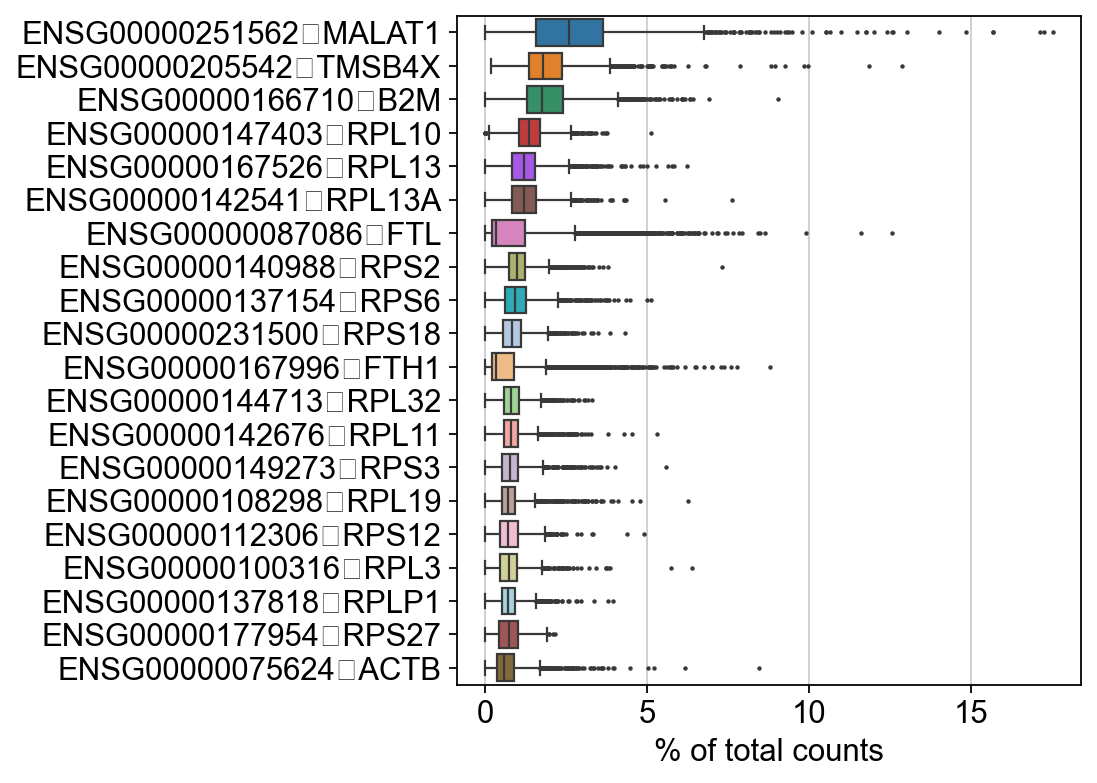

None


In [30]:
# Write the top n genes within fraction of the cells
# Visualize the Expression of the Top Highly Expressed Genes
top_genes = sc.pl.highest_expr_genes(adata, n_top=20)
print(top_genes)

# Section 3a: Incorporating Quality Control Statistics into Observation and Variable Dataframes

In [32]:
# Assuming 'adata' is your Seurat object
# Create a copy of the Seurat object
adata_wQC = adata.copy()
metrics_result = sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)
print(metrics_result)

None


In [33]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738

In [34]:
# This dataframe now contains: 
#                    1) X matrix with n_obs × n_vars = 2700 × 32738
#                    2) obs: 'n_genes_by_counts', 'total_counts'
#                    3) var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [35]:
# n_genes_by_counts - The number of genes with at least 1 count in a cell
# total_counts - Total number of counts for a cell

adata_wQC.obs

,n_genes_by_counts,total_counts
AAACATACAACCAC-1,781,2421.0
AAACATTGAGCTAC-1,1352,4903.0
AAACATTGATCAGC-1,1131,3149.0
AAACCGTGCTTCCG-1,960,2639.0
AAACCGTGTATGCG-1,522,981.0
...,...,...
TTTCGAACTCTCAT-1,1155,3461.0
TTTCTACTGAGGCA-1,1227,3447.0
TTTCTACTTCCTCG-1,622,1684.0
TTTGCATGAGAGGC-1,454,1024.0


In [36]:
adata_wQC.var

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ENSG00000243485\tMIR1302-10,0,0.0,100.0,0.0
ENSG00000237613\tFAM138A,0,0.0,100.0,0.0
ENSG00000186092\tOR4F5,0,0.0,100.0,0.0
ENSG00000238009\tRP11-34P13.7,0,0.0,100.0,0.0
ENSG00000239945\tRP11-34P13.8,0,0.0,100.0,0.0
...,...,...,...,...
ENSG00000215635\tAC145205.1,0,0.0,100.0,0.0
ENSG00000268590\tBAGE5,0,0.0,100.0,0.0
ENSG00000251180\tCU459201.1,0,0.0,100.0,0.0
ENSG00000215616\tAC002321.2,0,0.0,100.0,0.0


# Section 3b: Manual Addition of Columns to Observation and Variable Dataframes

In [37]:
adata_wQC.var_names
adata_wQC.var_names.str.startswith('MT-')
# annotate mitochondrial genes as 'mt' and calculate qc metrics
# creates a new column in var dataframe with boolean values for gene names that start with MT
adata_wQC
adata_wQC.var['mt'] = adata_wQC.var_names.str.startswith('MT-')# creates a new column in var dataframe with boolean values for gene names that start with MT
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [38]:

# print mt column
adata_wQC.var['mt']


ENSG00000243485\tMIR1302-10      False
ENSG00000237613\tFAM138A         False
ENSG00000186092\tOR4F5           False
ENSG00000238009\tRP11-34P13.7    False
ENSG00000239945\tRP11-34P13.8    False
                                 ...  
ENSG00000215635\tAC145205.1      False
ENSG00000268590\tBAGE5           False
ENSG00000251180\tCU459201.1      False
ENSG00000215616\tAC002321.2      False
ENSG00000215611\tAC002321.1      False
Name: mt, Length: 32738, dtype: bool

In [39]:
# print var dataframe columns
adata_wQC.var

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mt
ENSG00000243485\tMIR1302-10,0,0.0,100.0,0.0,False
ENSG00000237613\tFAM138A,0,0.0,100.0,0.0,False
ENSG00000186092\tOR4F5,0,0.0,100.0,0.0,False
ENSG00000238009\tRP11-34P13.7,0,0.0,100.0,0.0,False
ENSG00000239945\tRP11-34P13.8,0,0.0,100.0,0.0,False
...,...,...,...,...,...
ENSG00000215635\tAC145205.1,0,0.0,100.0,0.0,False
ENSG00000268590\tBAGE5,0,0.0,100.0,0.0,False
ENSG00000251180\tCU459201.1,0,0.0,100.0,0.0,False
ENSG00000215616\tAC002321.2,0,0.0,100.0,0.0,False


In [40]:
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_wQC, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [ ]:
Violin plot below explains the quality measures:

n_genes_by_counts - The number of genes with at least 1 count in a cell
total_counts - Total number of counts for a cell
pct_counts_mt - percentage of counts in mitochondrial genes

In [50]:
pip install matplotlib

In [51]:
import matplotlib

In [52]:
sc.pp.calculate_qc_metrics(adata_wQC, percent_top=None, log1p=False, inplace=True)

In [53]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [54]:
sc.pp.calculate_qc_metrics(adata_wQC, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [55]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [57]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


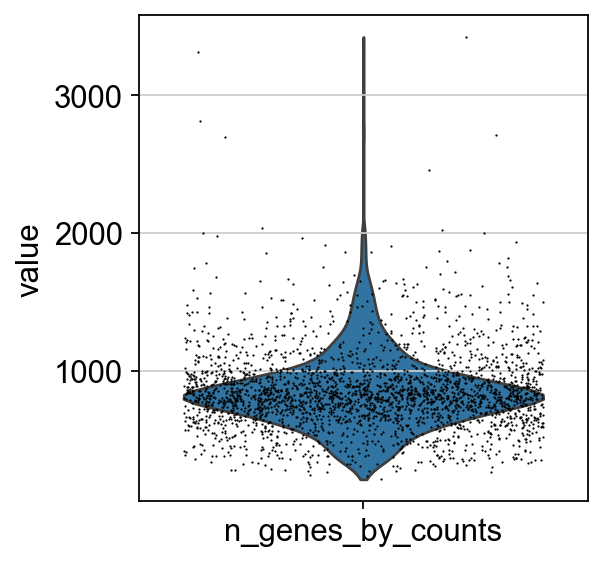

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


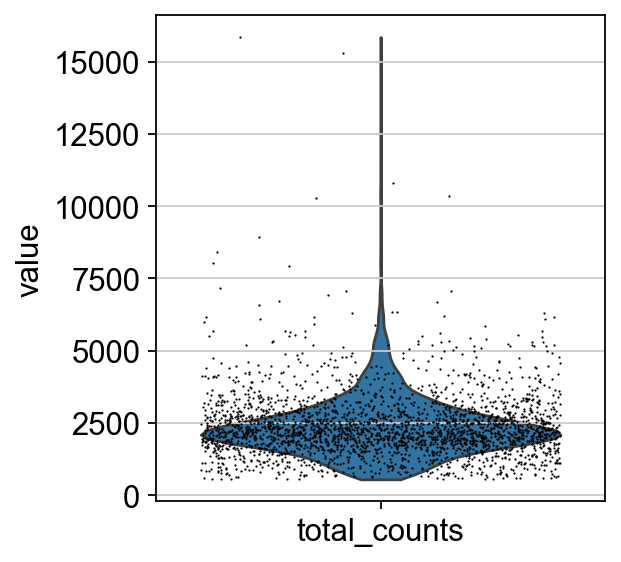

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


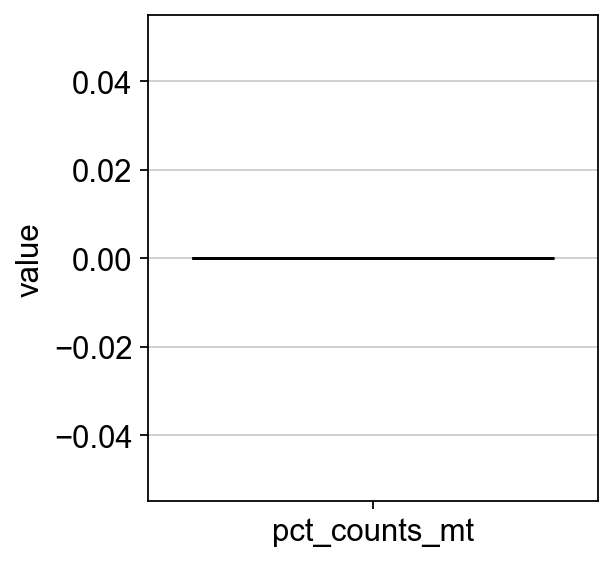

In [58]:
sc.pl.violin(adata, ['n_genes_by_counts'], save='_n_genes', jitter=0.4)
sc.pl.violin(adata, ['total_counts'], save='_total_counts', jitter=0.4)
sc.pl.violin(adata, ['pct_counts_mt'], save='_mito_pct', jitter=0.4)

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


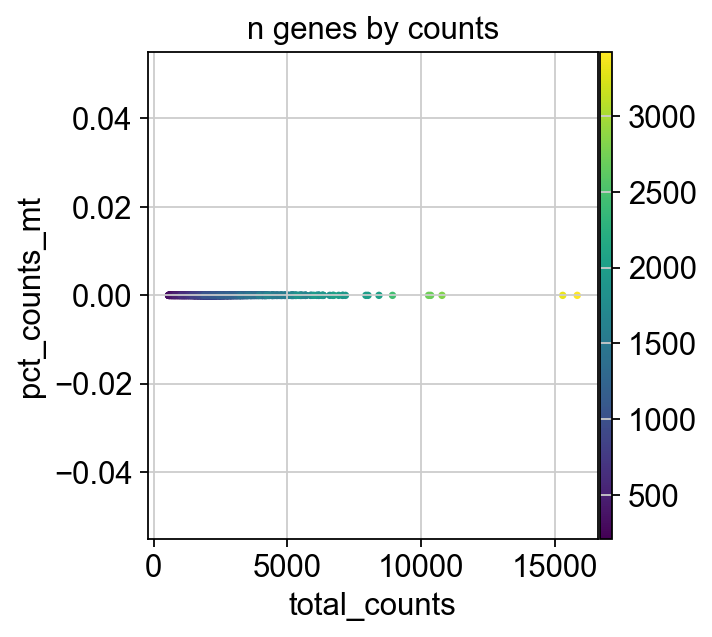

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


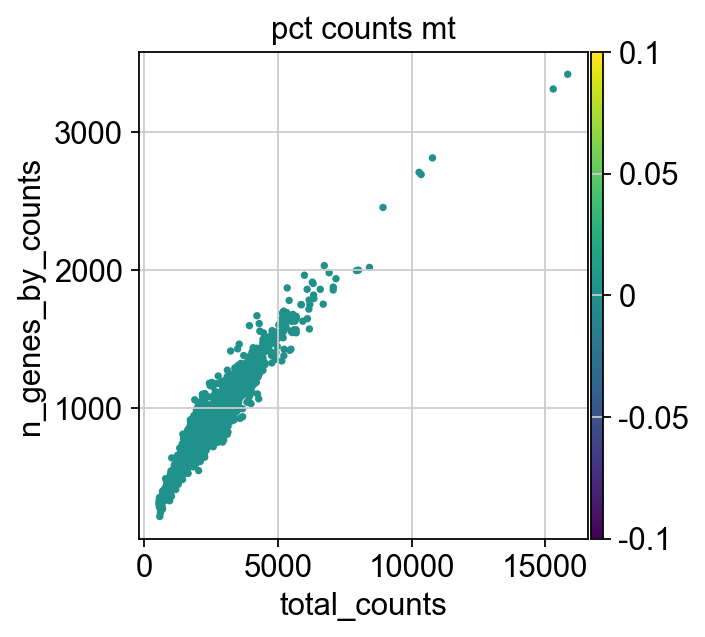

In [60]:
sc.pl.scatter(adata_wQC, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

# Section 4: Filtering cells and genes
Section 4a: Filtering cells with < 200 genes and higher mt genes (>5%)

In [61]:
# copy into a new AnnData object "adata_filt"
adata_filt = adata_wQC.copy()
print(adata_wQC)
sc.pp.filter_cells(adata_filt, min_genes=200)
print(adata_filt)
adata_filt = adata_filt[adata_filt.obs.pct_counts_mt < 5, :]
print(adata_filt)

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


In [62]:
print(adata_filt)
adata_filt = adata_filt[adata_filt.obs.n_genes_by_counts < 2500, :]
print(adata_filt)

View of AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2695 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


# Genes that are expressed in less than “X” cells

In [63]:
print(adata_filt)
sc.pp.filter_genes(adata_filt, min_cells=3)
print(adata_filt)

View of AnnData object with n_obs × n_vars = 2695 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
filtered out 19065 genes that are detected in less than 3 cells
AnnData object with n_obs × n_vars = 2695 × 13673
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'


C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\preprocessing\_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


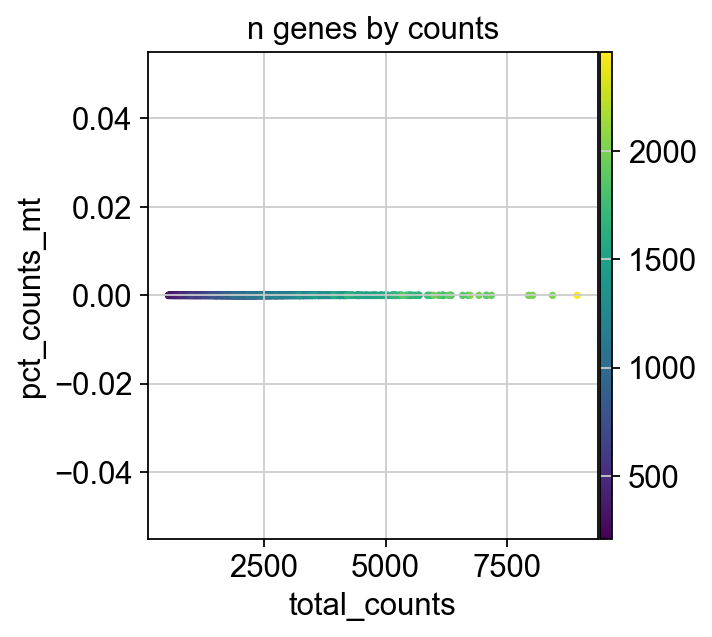

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


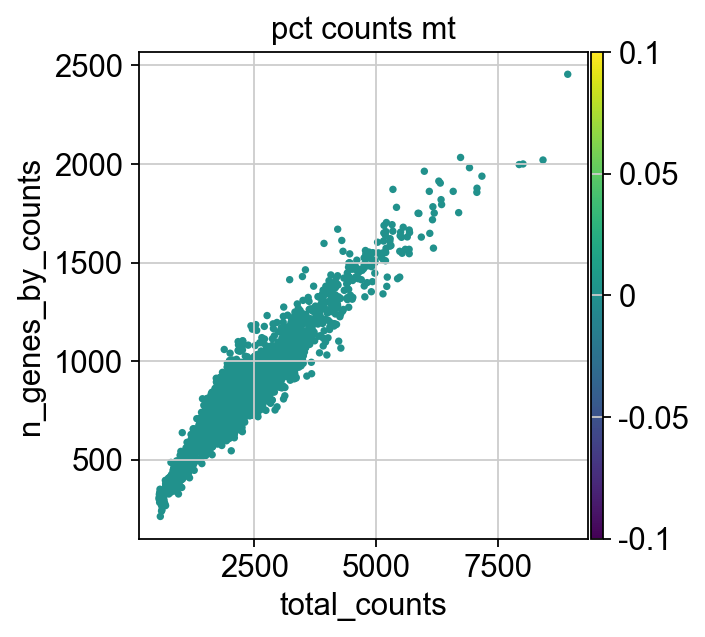

In [64]:
sc.pl.scatter(adata_filt, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_filt, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

# Section 5: Normalization and Log transformation
Normalisation is done to adjust the sampling effects or technical biases in the data.

Capture efficiency (efficiency with which a particular assay or method to detect the RNA in cell), sequencing depth (amount of RNA that is sequenced in an experiment), and other technical confounders (such as quality of the samples or the performance of the instrument) can all introduce bias and variation in gene expression data.

We will now normalize the counts in the data matrix X to 10,000 reads per cell

In [65]:
norm_data = adata_filt.copy()

sc.pp.normalize_total(norm_data, target_sum=1e4)
norm_data

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 2695 × 13673
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

In [66]:
#log n+1 transform
sc.pp.log1p(norm_data)
norm_data

AnnData object with n_obs × n_vars = 2695 × 13673
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'

# Section 6: Finding Highly variable genes
Highly variable genes are subset of genes that exhibit high cell-to-cell variation in expression levels

These genes may be highly influential in shaping the phenotype of an organism, and they are often of interest to researchers because of their potential role in disease or other biological processes.

HVG vs DEG
As highly variable genes are characterized by expression across the cells, differentially expressed genes are characterized by their significant changes in expression levels between different conditions or treatments.

In [67]:
# copy into a new AnnData object "HVG_data"
HVG_data = norm_data.copy()
sc.pp.highly_variable_genes(HVG_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
print(norm_data)

print(HVG_data)

extracting highly variable genes


C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
AnnData object with n_obs × n_vars = 2695 × 13673
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'
AnnData object with n_obs × n_vars = 2695 × 13673
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [68]:
HVG_data.var['highly_variable']

ENSG00000237683\tAL627309.1       False
ENSG00000228463\tAP006222.2       False
ENSG00000228327\tRP11-206L10.2    False
ENSG00000237491\tRP11-206L10.9    False
ENSG00000225880\tLINC00115        False
                                  ...  
ENSG00000215750\tAC145212.1       False
ENSG00000220023\tAL592183.1       False
ENSG00000215615\tAL354822.1       False
ENSG00000215700\tPNRC2            False
ENSG00000215699\tSRSF10           False
Name: highly_variable, Length: 13673, dtype: bool

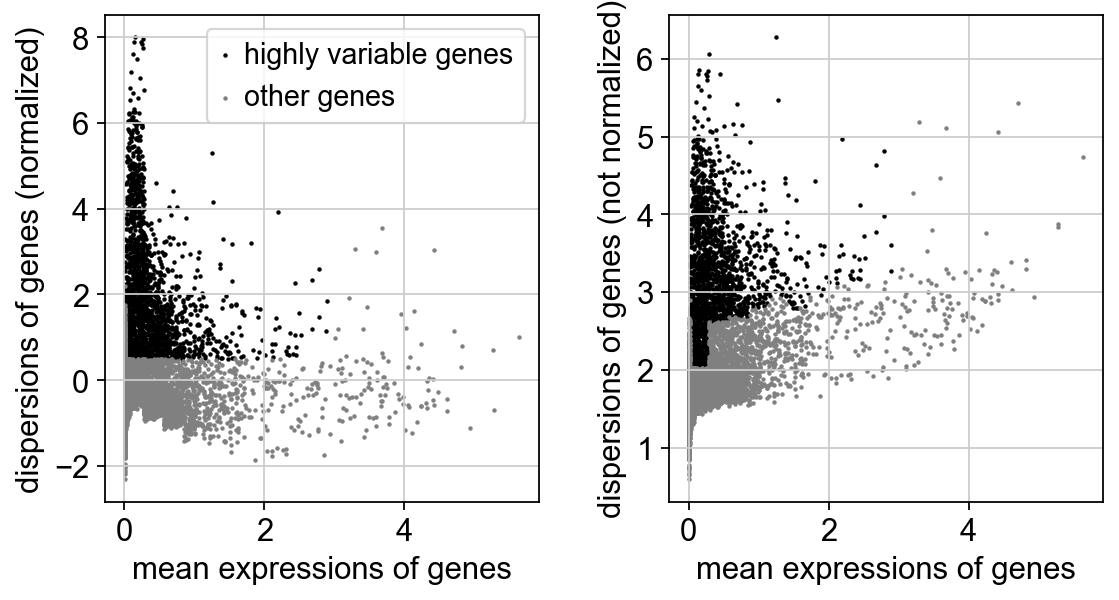

In [69]:
sc.pl.highly_variable_genes(HVG_data)

In [70]:
# now we will filter out the highly variable genes
HVG_data = HVG_data[:, HVG_data.var.highly_variable]
HVG_data

View of AnnData object with n_obs × n_vars = 2695 × 1865
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

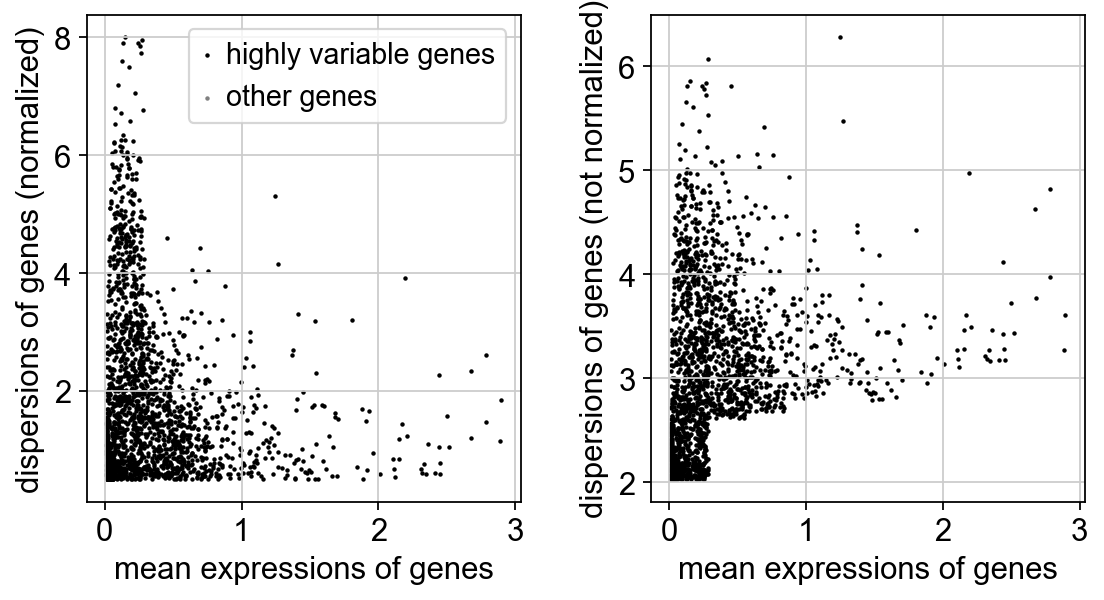

In [71]:
sc.pl.highly_variable_genes(HVG_data)

# Section 7: Scaling the data

In [72]:
# copy into a new AnnData object "pcHVG_data"
pcHVG_data = HVG_data.copy()

# scale to unit variance for PCA, clip values exceeding standard deviation 10
sc.pp.scale(pcHVG_data, max_value=10)
print(HVG_data)
print(pcHVG_data)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
View of AnnData object with n_obs × n_vars = 2695 × 1865
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
AnnData object with n_obs × n_vars = 2695 × 1865
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'


# Section 8: Dimensionality reduction with PCA
Very useful tool for dimensionality reduction
Fast and efficient
Helps in deciding number of PCs to use for clustering analysis downstream

In [73]:
sc.tl.pca(pcHVG_data)
print(pcHVG_data)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
AnnData object with n_obs × n_vars = 2695 × 1865
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


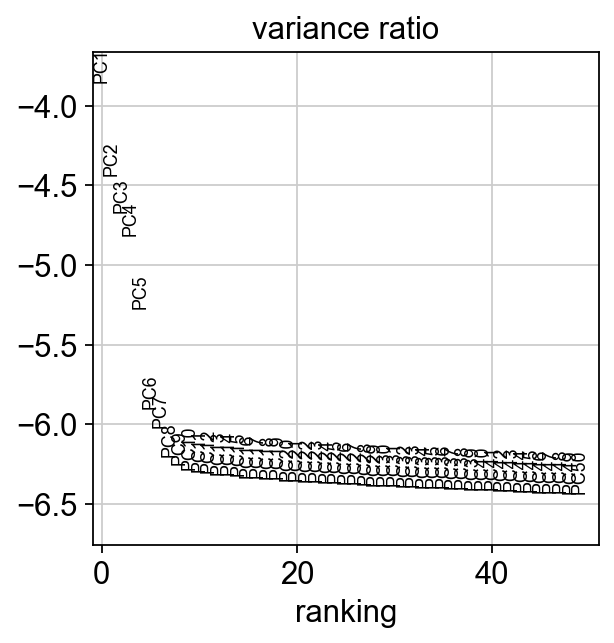

In [75]:
sc.pl.pca_variance_ratio(pcHVG_data, log=True, n_pcs=50)

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


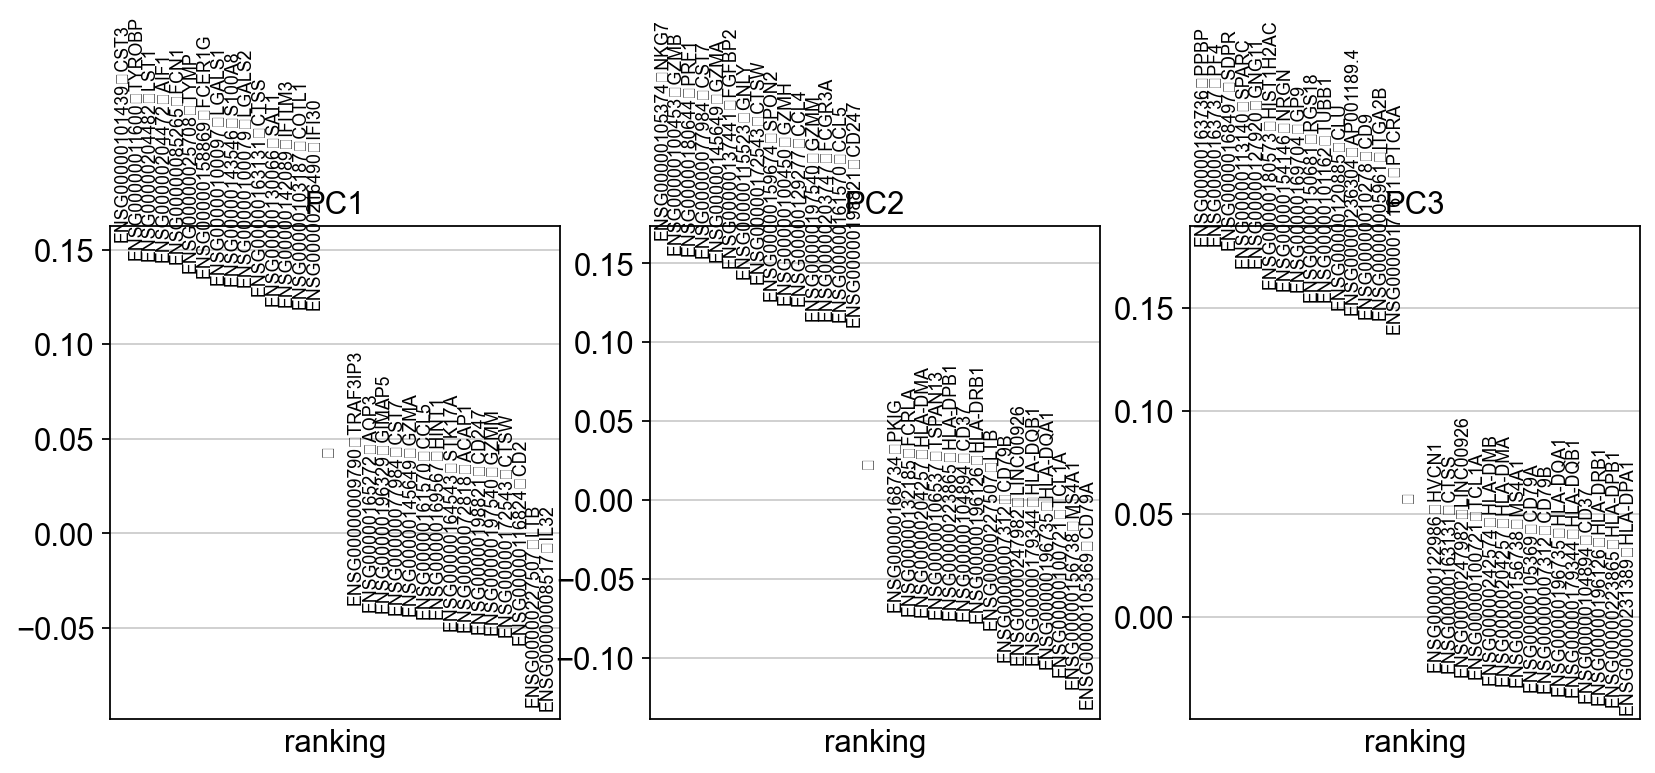

In [76]:
sc.pl.pca_loadings(pcHVG_data) 

# Section 9: Finding Neighbors by computing the neighborhood graph

In [80]:
sc.pp.neighbors(pcHVG_data, n_pcs=15)
pcHVG_data

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)


AnnData object with n_obs × n_vars = 2695 × 1865
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [81]:
pcHVG_data.obsp

PairwiseArrays with keys: distances, connectivities

In [82]:
for key, value in pcHVG_data.obsp.items():
    print("key: ", key)
    print("value: ", value)

key:  distances
value:    (0, 19)	4.72824239730835
  (0, 314)	4.573995113372803
  (0, 418)	4.848921298980713
  (0, 502)	5.040236949920654
  (0, 597)	4.785571098327637
  (0, 979)	5.071577548980713
  (0, 1022)	4.885008811950684
  (0, 1169)	4.729578971862793
  (0, 1394)	5.094236373901367
  (0, 1867)	4.872384548187256
  (0, 1911)	5.081656455993652
  (0, 2017)	4.11076545715332
  (0, 2192)	4.154519557952881
  (0, 2329)	4.835390090942383
  (1, 10)	5.141336441040039
  (1, 169)	5.988517761230469
  (1, 360)	6.281250476837158
  (1, 434)	6.369228839874268
  (1, 941)	5.895865440368652
  (1, 1015)	6.2095136642456055
  (1, 1066)	6.238424301147461
  (1, 1080)	5.783201694488525
  (1, 1222)	5.994646072387695
  (1, 1846)	5.7298054695129395
  (1, 2047)	6.3920392990112305
  :	:
  (2693, 868)	4.67354154586792
  (2693, 1441)	4.740908622741699
  (2693, 1519)	4.659758567810059
  (2693, 1674)	4.688539505004883
  (2693, 2158)	4.807179927825928
  (2693, 2208)	4.745228290557861
  (2693, 2228)	4.826753616333008
  (

# Section 10: Embedding the neighborhood graph by running UMAP
Some cells may have very similar patterns of gene despite not being the same type of cell.
UMAP and t-SNE could be used to identify the cells that have similar patterns of gene expression and group them together.
UMAP is better at preserving the global neighborhood structure of the data compared to t-SNE.
Thus, PCA which uses a linear model cannot capture patterns based on gene expression.

In [83]:
umHVG_data = pcHVG_data.copy()
sc.tl.umap(umHVG_data)
umHVG_data

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


AnnData object with n_obs × n_vars = 2695 × 1865
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [84]:
print(umHVG_data.obsm['X_pca'])

[[-4.2592483   0.36459738 -0.18976738 ...  2.7145483   0.07256641
   1.7016004 ]
 [-0.3219901  -5.7055135  -2.2532294  ...  1.1399388  -0.93485194
   2.8424828 ]
 [-2.091949    2.7007728   0.4112182  ...  1.5952389  -4.6754355
  -1.6224722 ]
 ...
 [-2.2507694  -7.661368   -1.8440402  ... -0.7253227   1.2232087
  -1.1224074 ]
 [-2.824457   -6.9976206  -1.1081623  ...  0.444426    0.7124117
  -1.1777345 ]
 [-2.8608925  -1.0878298   0.4139127  ... -1.0746979  -0.05637337
  -0.18133193]]


In [85]:
print(umHVG_data.obsm['X_umap'])

[[-3.3371973   9.067121  ]
 [ 7.173458    1.063436  ]
 [-4.19938    11.428306  ]
 ...
 [ 8.863578   -0.6486237 ]
 [ 8.054465   -0.42937812]
 [-3.6522932   7.996003  ]]


# Section 11: Visualization

In [90]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=40


C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:03)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
